   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

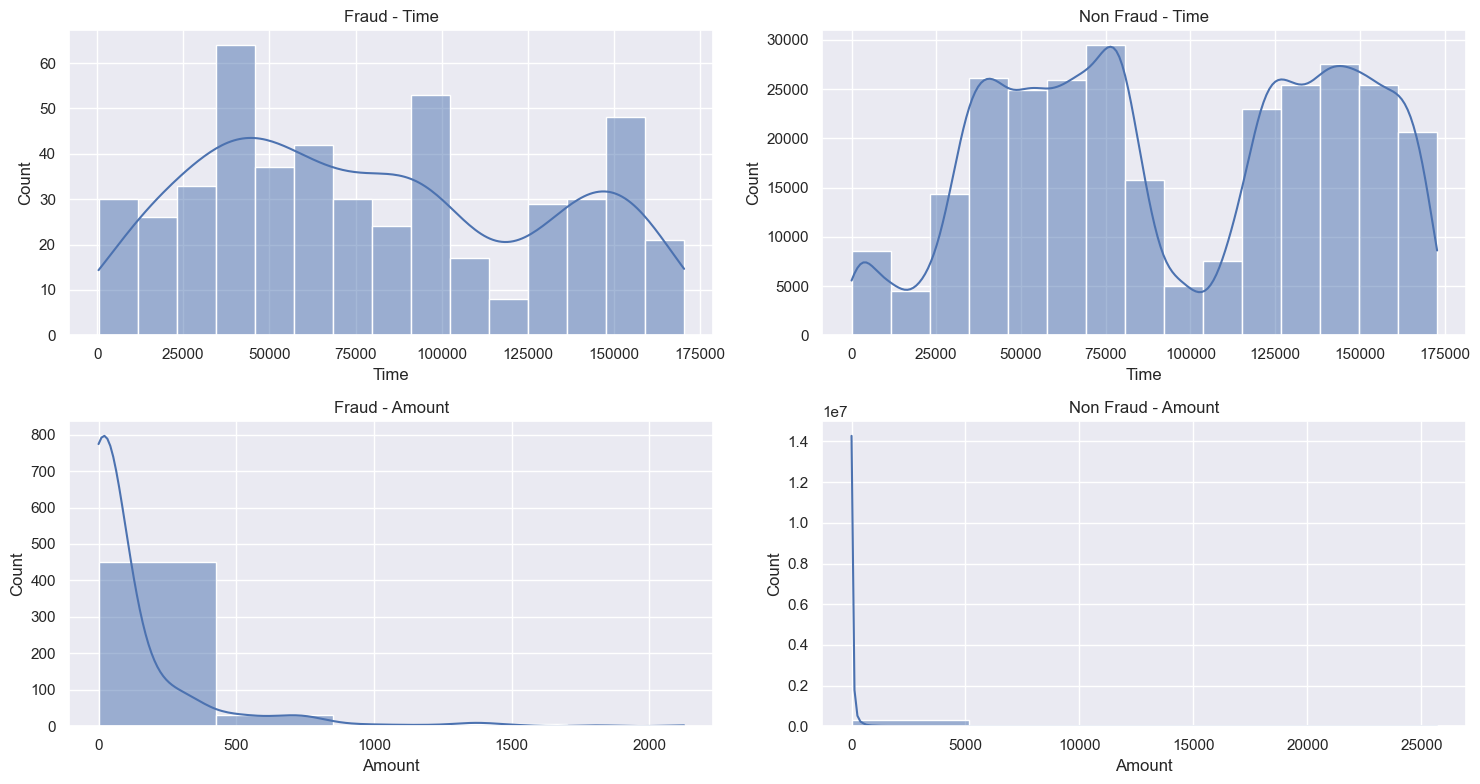

Class Distribution (Normalized):
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


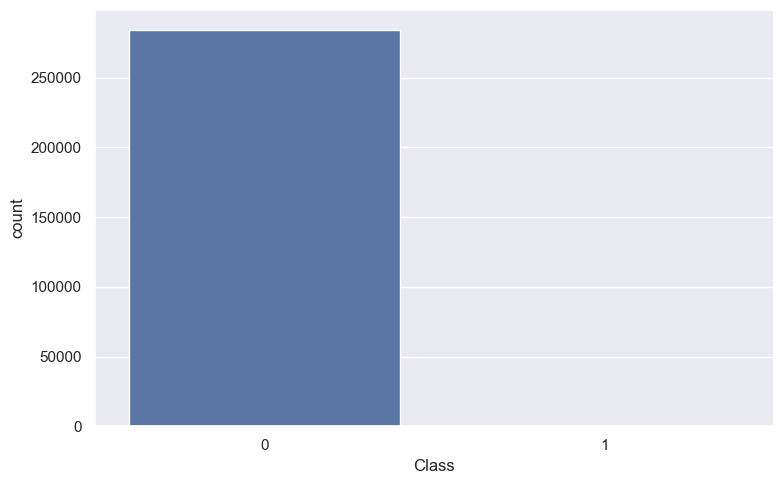

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  std_amount  std_time  
0 -0.

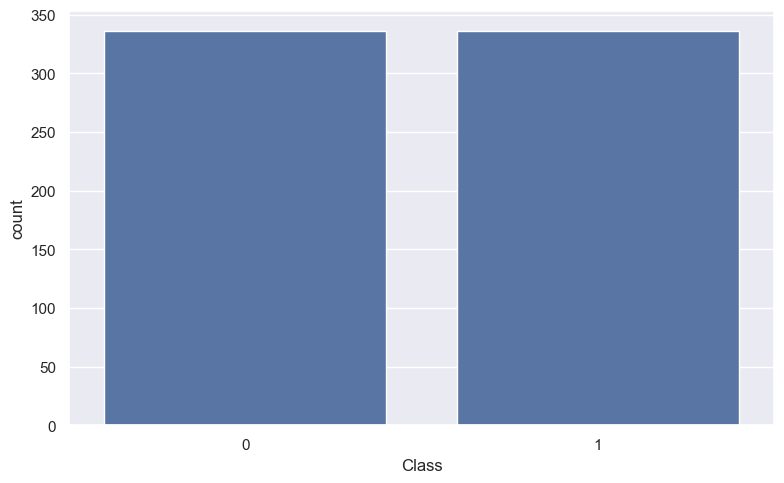

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import export_graphviz

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from IPython.display import Image  
import pydotplus
import pandas as pd
import zipfile


# Configuring the notebook
sns.set()
%matplotlib inline

# Reading the data

# Specify the path to the ZIP file and the CSV file inside it
zip_path = r"C:\Users\KALINND SHARMA\Downloads\creditcard.csv.zip"
csv_filename = "creditcard.csv"  # This should be the name of the CSV inside the ZIP

# Open the ZIP file and read the CSV
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        data = pd.read_csv(f)

# Now, you can proceed with the rest of your code
print(data.head())


# Plotting distributions of 'Time' and 'Amount' for fraud and non-fraud cases
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))

sns.histplot(data['Time'][data['Class'] == 1], bins=15, ax=ax1, kde=True)
sns.histplot(data['Time'][data['Class'] == 0], bins=15, ax=ax2, kde=True)

sns.histplot(data['Amount'][data['Class'] == 1], bins=5, ax=ax3, kde=True)
sns.histplot(data['Amount'][data['Class'] == 0], bins=5, ax=ax4, kde=True)

ax1.set_title('Fraud - Time')
ax2.set_title('Non Fraud - Time')
ax3.set_title('Fraud - Amount')
ax4.set_title('Non Fraud - Amount')
plt.tight_layout()
plt.show()

# Checking class distribution
print("Class Distribution (Normalized):\n", data['Class'].value_counts(normalize=True))

# Plotting class counts
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Class', data=data)
plt.tight_layout()
plt.show()

# Feature scaling for 'Amount' and 'Time' columns
scaler = StandardScaler()
data['std_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['std_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data.drop(['Amount', 'Time'], axis=1, inplace=True)

# Checking the first few rows of transformed data
print(data.head())

# Splitting the data
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Applying random under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checking the distribution after resampling
print("Resampled Class Distribution (Normalized):\n", pd.Series(y_rus).value_counts(normalize=True))

# Plotting resampled class counts
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=y_rus)
plt.tight_layout()
plt.show()
